In [212]:
import pandas as pd 
dataset = pd.read_csv("flat-prices.csv")

In [213]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB


In [214]:
# dataset['month'] = dataset.month.apply(lambda x: int(x.split('-')[0]) + int(x.split('-')[1]))

In [215]:
dataset

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287191,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000
287192,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000
287193,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000
287194,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000


In [216]:
dataset.town.unique() #Have to be turned into dummy variables

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS'],
      dtype=object)

In [217]:
dataset.flat_type.unique() #ordinal data 

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [218]:
def convert(roomtype: str):
    if roomtype=='1 ROOM':
        return 0
    elif roomtype=='2 ROOM':
        return 1
    elif roomtype == '3 ROOM':
        return 2
    elif roomtype == '4 ROOM':
        return 3
    elif roomtype == '5 ROOM':
        return 4 
    elif roomtype == 'EXECUTIVE':
        return 6
    else: return 7

In [219]:
dataset['flat_type'] = dataset.flat_type.map(convert)

In [220]:
dataset

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,0,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,0,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,0,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,0,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,2,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287191,1999-12,YISHUN,6,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000
287192,1999-12,YISHUN,6,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000
287193,1999-12,YISHUN,6,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000
287194,1999-12,YISHUN,6,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000


In [221]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  int64  
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 21.9+ MB


In [222]:
dataset.storey_range.unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24'], dtype=object)

In [223]:
dataset.flat_model.unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT'], dtype=object)

In [224]:
dataset['storey_range'] = dataset.storey_range.apply(lambda x: ['01 TO 03', '04 TO 06', '07 TO 09', '10 TO 12', '13 TO 15', '16 TO 18', '19 TO 21', '22 TO 24', '25 TO 27'].index(x))

In [225]:
ordered_set = ['STANDARD', 'APARTMENT','IMPROVED',  '2-ROOM',  'SIMPLIFIED','TERRACE', 'MAISONETTE', 'MODEL A', 'MODEL A-MAISONETTE','NEW GENERATION', 'MULTI GENERATION', 'IMPROVED-MAISONETTE','PREMIUM APARTMENT']
dataset['flat_model'] = dataset.flat_model.apply(lambda x: ordered_set.index(x))

In [226]:
dataset.block.unique().shape

(1094,)

In [227]:
import seaborn as sns 

<AxesSubplot:>

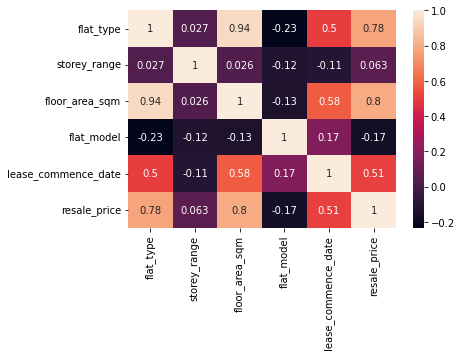

In [228]:
sns.heatmap(dataset.corr(), annot=True)

In [229]:
dataset.corr()

,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
flat_type,1.000000,0.026752,0.939738,-0.234347,0.499399,0.775061
storey_range,0.026752,1.000000,0.025709,-0.120939,-0.113565,0.062945
floor_area_sqm,0.939738,0.025709,1.000000,-0.134468,0.578492,0.797014
flat_model,-0.234347,-0.120939,-0.134468,1.000000,0.166166,-0.168893
lease_commence_date,0.499399,-0.113565,0.578492,0.166166,1.000000,0.505069
resale_price,0.775061,0.062945,0.797014,-0.168893,0.505069,1.000000


In [230]:
dataset.describe()

,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
count,287196.000000,287196.000000,287196.000000,287196.000000,287196.000000,287196.00000
mean,2.971525,1.734784,93.351778,5.357491,1983.206897,219541.67471
std,1.163270,1.391025,27.361872,3.131061,6.085632,128145.25346
min,0.000000,0.000000,28.000000,0.000000,1967.000000,5000.00000
25%,2.000000,1.000000,68.000000,2.000000,1979.000000,127000.00000
50%,3.000000,2.000000,91.000000,7.000000,1984.000000,195000.00000
75%,3.000000,3.000000,113.000000,9.000000,1987.000000,298000.00000
max,7.000000,8.000000,307.000000,12.000000,1997.000000,900000.00000


array([[<AxesSubplot:title={'center':'flat_type'}>,
        <AxesSubplot:title={'center':'storey_range'}>],
       [<AxesSubplot:title={'center':'floor_area_sqm'}>,
        <AxesSubplot:title={'center':'flat_model'}>],
       [<AxesSubplot:title={'center':'lease_commence_date'}>,
        <AxesSubplot:title={'center':'resale_price'}>]], dtype=object)

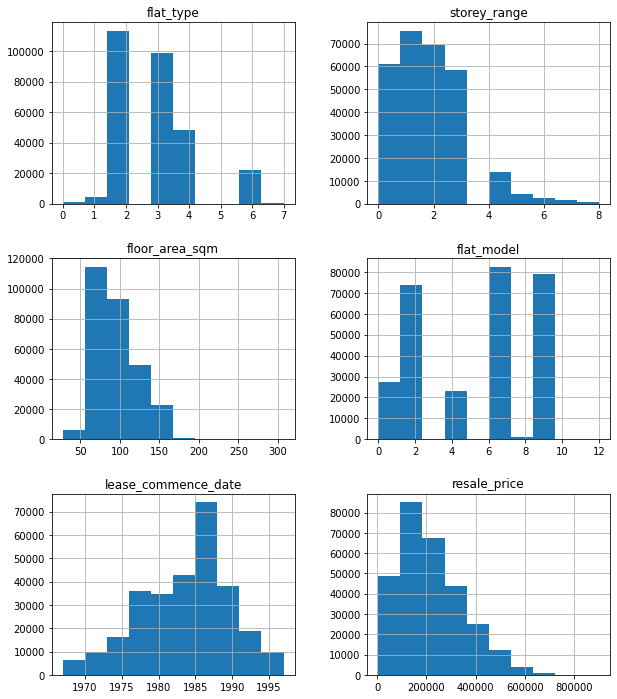

In [231]:
dataset.hist(figsize=(10, 12))

In [232]:
dataset

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,0,309,ANG MO KIO AVE 1,3,31.0,2,1977,9000
1,1990-01,ANG MO KIO,0,309,ANG MO KIO AVE 1,1,31.0,2,1977,6000
2,1990-01,ANG MO KIO,0,309,ANG MO KIO AVE 1,3,31.0,2,1977,8000
3,1990-01,ANG MO KIO,0,309,ANG MO KIO AVE 1,2,31.0,2,1977,6000
4,1990-01,ANG MO KIO,2,216,ANG MO KIO AVE 1,1,73.0,9,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287191,1999-12,YISHUN,6,611,YISHUN ST 61,3,142.0,1,1987,456000
287192,1999-12,YISHUN,6,324,YISHUN CTRL,0,142.0,1,1988,408000
287193,1999-12,YISHUN,6,392,YISHUN AVE 6,2,146.0,6,1988,469000
287194,1999-12,YISHUN,6,356,YISHUN RING RD,1,146.0,6,1988,440000


In [233]:
dataset = pd.get_dummies(dataset)
dataset = dataset.drop(['street_name_YISHUN ST 21', 'town_YISHUN', 'block_309', 'month_1990-01'], axis=1)

In [234]:
y = dataset.resale_price
x = dataset.drop('resale_price', axis=1)

In [235]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = 0.75)

In [236]:
x_train

,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,month_1990-02,month_1990-03,month_1990-04,month_1990-05,month_1990-06,...,street_name_YISHUN ST 22,street_name_YISHUN ST 61,street_name_YISHUN ST 71,street_name_YISHUN ST 72,street_name_YISHUN ST 81,street_name_YUNG AN RD,street_name_YUNG HO RD,street_name_YUNG KUANG RD,street_name_YUNG PING RD,street_name_ZION RD
71608,2,2,59.0,2,1981,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217677,3,0,104.0,7,1986,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162096,2,2,74.0,7,1988,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32184,4,2,120.0,0,1977,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
230111,4,1,125.0,0,1977,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,4,0,135.0,7,1993,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86293,3,0,104.0,7,1987,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122579,3,3,104.0,7,1987,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152315,3,0,91.0,9,1980,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [238]:
regressor.fit(x_train, y_train)

LinearRegression()

In [239]:
regressor.score(x_train, y_train)

0.94083767255216

In [240]:
preds = regressor.predict(x_test)

In [241]:
predictions = pd.DataFrame(y_test)

In [242]:
predictions['preds'] = preds

In [243]:
regressor.score(x_test, y_test)

-490761985771.0303

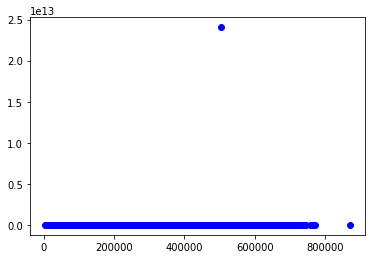

In [244]:
from matplotlib import pyplot as plt 
plt.scatter(predictions.resale_price, predictions.preds, color='b')

In [245]:
predictions

,resale_price,preds
11074,80000,55272.081988
239137,138200,138524.820269
247871,138000,143699.483599
222125,325000,306318.847613
202032,210000,222974.130175
...,...,...
247819,320000,316743.501910
246004,137000,139753.330035
75272,200000,239791.946490
204987,242000,234697.882769


In [246]:
predictions['error'] = predictions.resale_price - predictions.preds

In [247]:
predictions

,resale_price,preds,error
11074,80000,55272.081988,24727.918012
239137,138200,138524.820269,-324.820269
247871,138000,143699.483599,-5699.483599
222125,325000,306318.847613,18681.152387
202032,210000,222974.130175,-12974.130175
...,...,...,...
247819,320000,316743.501910,3256.498090
246004,137000,139753.330035,-2753.330035
75272,200000,239791.946490,-39791.946490
204987,242000,234697.882769,7302.117231


In [248]:
import numpy as np 
SSE = np.sum(predictions.error**2)

In [249]:
Se = (SSE/71797)**0.5

In [250]:
mean_err = np.mean(predictions.error)

In [251]:
Se

89788835396.74144

In [252]:
SSE

5.788299241597589e+26

In [253]:
mean_err

-335086662.25801516

In [254]:
y_bar = np.mean(predictions.resale_price)

In [255]:
den = np.sum((predictions.resale_price - y_bar)**2)

In [256]:
num = np.sum((predictions.resale_price - predictions.preds)**2)

In [257]:
score = 1 - num/den

In [258]:
score

-490761985771.0303

In [259]:
num

5.788299241597589e+26

In [260]:
den

1179451426436761.8

In [261]:
predictions['mean_error'] = predictions.resale_price - y_bar

In [262]:
predictions

,resale_price,preds,error,mean_error
11074,80000,55272.081988,24727.918012,-140056.419435
239137,138200,138524.820269,-324.820269,-81856.419435
247871,138000,143699.483599,-5699.483599,-82056.419435
222125,325000,306318.847613,18681.152387,104943.580565
202032,210000,222974.130175,-12974.130175,-10056.419435
...,...,...,...,...
247819,320000,316743.501910,3256.498090,99943.580565
246004,137000,139753.330035,-2753.330035,-83056.419435
75272,200000,239791.946490,-39791.946490,-20056.419435
204987,242000,234697.882769,7302.117231,21943.580565


In [263]:
np.sum(predictions.mean_error**2)

1179451426436761.8

In [264]:
np.sum(predictions.error**2)

5.788299241597589e+26

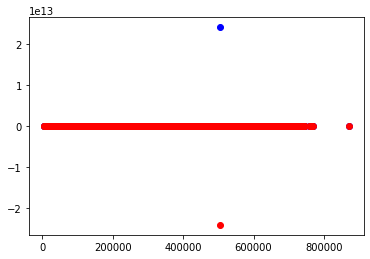

In [265]:
from matplotlib import pyplot as plt 
plt.scatter(predictions.resale_price, predictions.preds, color='b')
plt.scatter(predictions.resale_price, predictions.error, color='r')

In [266]:
predictions.describe()

,resale_price,preds,error,mean_error
count,71799.000000,7.179900e+04,7.179900e+04,7.179900e+04
mean,220056.419435,3.353067e+08,-3.350867e+08,-1.434620e-11
std,128169.254021,8.978759e+10,8.978758e+10,1.281693e+05
min,5000.000000,-1.136233e+05,-2.405888e+13,-2.150564e+05
25%,127000.000000,1.362222e+05,-1.637889e+04,-9.305642e+04
50%,195000.000000,2.126765e+05,-8.668867e+02,-2.505642e+04
75%,300000.000000,2.997663e+05,1.607324e+04,7.994358e+04
max,870000.000000,2.405889e+13,2.542442e+05,6.499436e+05


In [267]:
predictions[(predictions.preds > 870000)]

,resale_price,preds,error,mean_error
119896,505000,2.405889e+13,-2.405888e+13,284943.580565


In [268]:
predictions.drop(predictions[predictions.preds > 870000].index, inplace=True)

In [269]:
predictions

,resale_price,preds,error,mean_error
11074,80000,55272.081988,24727.918012,-140056.419435
239137,138200,138524.820269,-324.820269,-81856.419435
247871,138000,143699.483599,-5699.483599,-82056.419435
222125,325000,306318.847613,18681.152387,104943.580565
202032,210000,222974.130175,-12974.130175,-10056.419435
...,...,...,...,...
247819,320000,316743.501910,3256.498090,99943.580565
246004,137000,139753.330035,-2753.330035,-83056.419435
75272,200000,239791.946490,-39791.946490,-20056.419435
204987,242000,234697.882769,7302.117231,21943.580565


In [272]:
num = 1 - (np.sum((predictions.resale_price - predictions.preds)**2)/den)

In [273]:
num

0.9401171901161922

In [276]:
r = num**0.5

In [277]:
r

0.9695964057875793

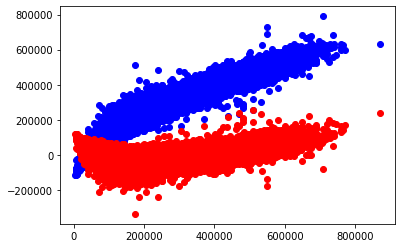

In [282]:
from matplotlib import pyplot as plt 
plt.scatter(predictions.resale_price, predictions.preds, color='b')
plt.scatter(predictions.resale_price, predictions.error, color='r')

In [283]:
Se = (np.sum((predictions.resale_price - predictions.preds)**2)/71796)**0.5

In [284]:
Se

31364.689376971208

In [285]:
mean = np.mean(predictions.resale_price)

In [286]:
mean

220052.45075071728

In [289]:
value = np.std(predictions.resale_price)

In [290]:
regressor.predict(x_train)

array([112216.97993721, 263849.96089424, 239722.73433174, ...,
       283776.07705873, 296002.57417549, 154368.12105049])

In [291]:
import pickle 
with open('flat-prices-regressor', 'wb') as f:
    pickle.dump(regressor, f)